In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Image Processing with Neural Network
## Template 01

## Template with helper functions

- Moons Dataset
- Decision Boundary
- Loss curve

<img src='../../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>

## Import Statements

In [4]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
# from utils.helper import fn_plot_decision_boundary # this function is from helper.py

In [5]:
# print (fn_plot_decision_boundary.__doc__)

## Setup Global Parameters

In [7]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 500  # number of epochs
ALPHA = 0.001  # learning rate
N_SAMPLES = 1000
BATCH_SIZE = 32
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [8]:
def fn_plot_decision_boundary(model, X, y):
    
    # initialize the figure
    fig, ax = plt.subplots(figsize = (8,5));
    
    # Small increment to create object function surface
    dm = 0.01
    
    # Range of X values (First feature)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    
    # Range of Y values (Second feature)
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a grid to evaluate the object function
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # flatten and stack
    # arrays will be stacked along their last axis after being upgraded to at least 2-D 
    # with 1’s post-pended to the shape (column vectors made out of 1-D arrays)
    XX = np.c_[xx.ravel(), yy.ravel()]

    # list to collect predictions
    y_p = model.predict(XX)
    Z = y_p.argmax(axis =1)
    Z = Z.reshape(xx.shape)

    # add another column filled with 1 to make it work with the predict function
    XX = np.hstack( ( XX, np.ones((XX.shape[0],1)) ) )
    
    # list to collect predictions
    y_pred = []
    
    # Iterate over rows
    # for row in (XX):

    #     # a = predict(row, wts) # this is a float between [0, 1]

    #     y_p = predict(row, wts)
    #     pred = 0
    #     if y_p>0.5:
    #         pred=1
    #     y_pred.append(pred)
        
    # Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k', cmap=plt.cm.bwr)
    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    ax.set_ylabel('B')
    plt.show()

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;color:red;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [10]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, noise=NOISE, shuffle=True, random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em;color:red;">
DataFrames are easier to visualize
</p>

In [12]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [14]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


<Axes: xlabel='target'>

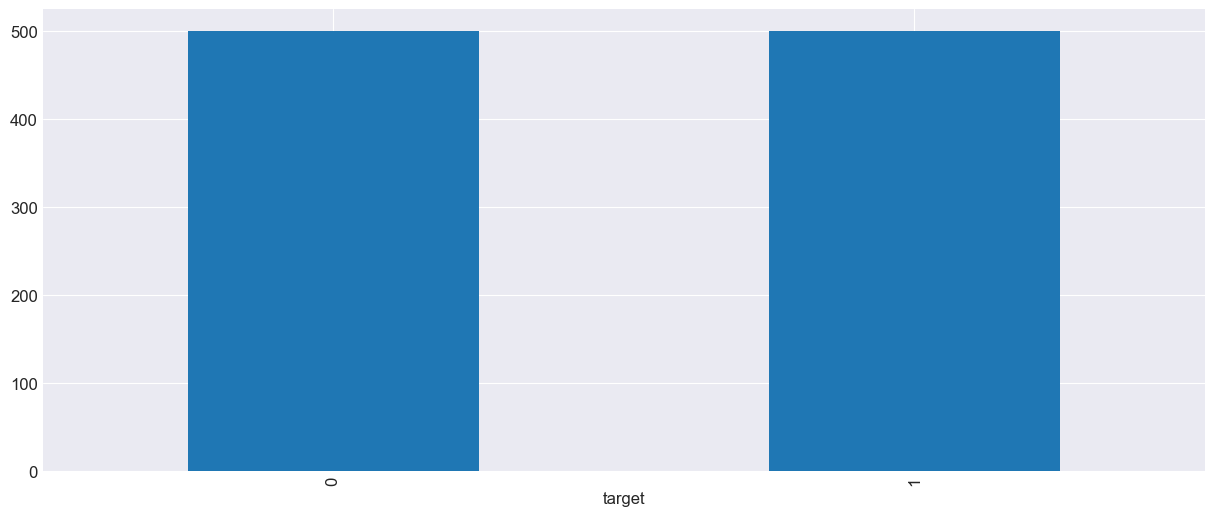

In [15]:
data_df['target'].value_counts().plot(kind='bar')

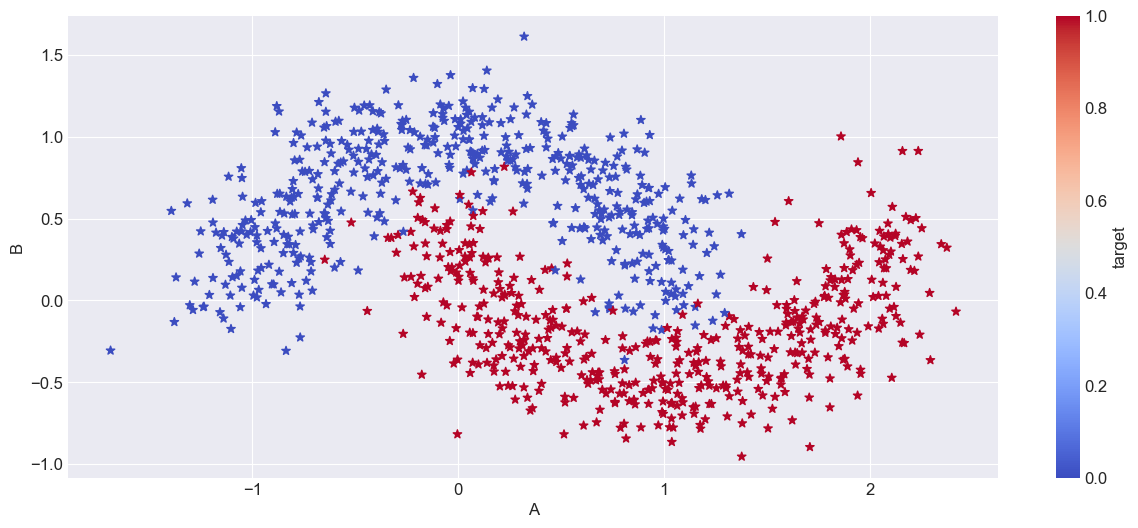

In [16]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

In [17]:
# cobvert to one hot encoding

In [18]:

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify=y,random_state=RANDOM_STATE )

X_train.shape, X_test.shape,y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [19]:
# Define Model

In [20]:
tf.__version__

'2.18.0'

In [21]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,),name = 'input'),
    tf.keras.layers.Dense(5,activation='relu',name = 'Layer_1'),
    tf.keras.layers.Dense(5,activation='relu',name = 'Layer_2'),
    tf.keras.layers.Dense(4,activation='relu',name = 'Layer_3'),
    tf.keras.layers.Dense(3,activation='relu',name = 'Layer_4'),
    tf.keras.layers.Dense(2,name = 'output'),
],name = 'first_model')

- functional API - user defined sequence
- Extend the model Class

In [23]:
np.exp(710)

C:\Users\duasp\AppData\Local\Temp\ipykernel_2164\574927170.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(710)


inf

In [24]:
X_train[:1].shape

(1, 2)

In [25]:
prediction = model(X_train[:1]).numpy()

In [26]:
tf.nn.softmax(prediction).numpy()

array([[0.5208589, 0.4791412]], dtype=float32)

- 2*5+5
- 5*5+5
- 5*4+4
- 4*3+3
- 3*2+2

In [28]:
model.summary()

Model: "first_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_1 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_3 (Dense)                 │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_4 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92 (368.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
y_train[:1].shape,prediction.shape

((1,), (1, 2))

In [30]:
# y vector is sparse
# no action in output layer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [31]:

loss_fn(y_train[:1],prediction)

<tf.Tensor: shape=(), dtype=float32, numpy=0.735759973526001>

In [32]:
model.compile(optimizer = 'adam',loss = loss_fn,metrics=['accuracy'])

In [33]:
history=model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = EPOCHS)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5490 - loss: 0.6632 - val_accuracy: 0.7550 - val_loss: 0.6329
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7243 - loss: 0.6273 - val_accuracy: 0.8050 - val_loss: 0.5967
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8220 - loss: 0.5924 - val_accuracy: 0.8350 - val_loss: 0.5624
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8261 - loss: 0.5633 - val_accuracy: 0.8350 - val_loss: 0.5334
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8421 - loss: 0.5340 - val_accuracy: 0.8200 - val_loss: 0.5121
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8147 - loss: 0.5238 - val_accuracy: 0.8150 - val_loss: 0.4964
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8265 - loss: 0.5060 - val_accuracy: 0.8050 - val_loss: 0.4836
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: 0.4908 - val_accuracy: 0.8050 - v

<Axes: >

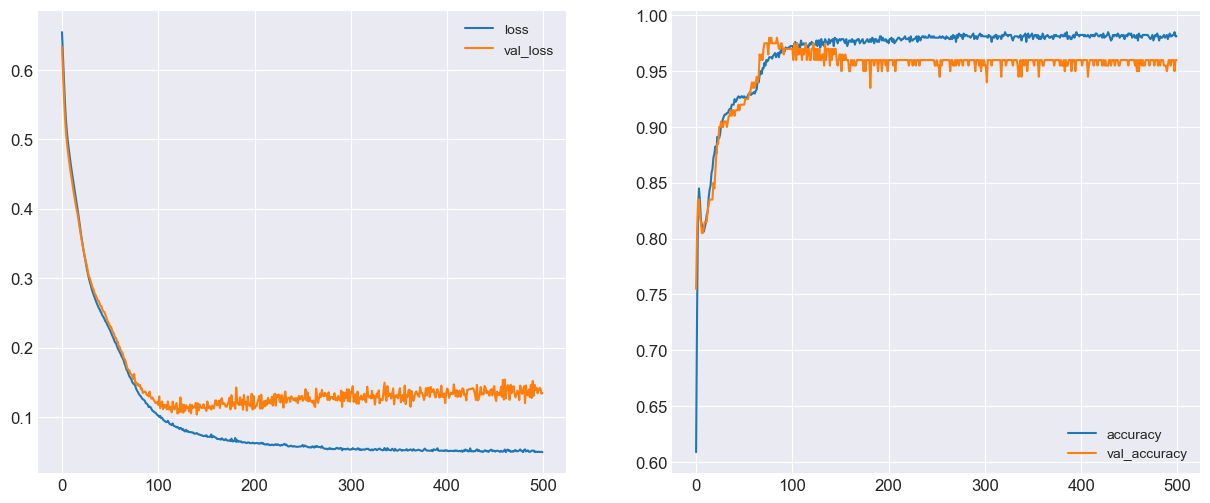

In [34]:
hist_df = pd.DataFrame(history.history)
fig,axes = plt.subplots(1,2)
ax = axes[0]
hist_df.plot(y=['loss','val_loss'],ax = ax)
ax = axes[1]
hist_df.plot(y = ['accuracy','val_accuracy'],ax = ax)

In [35]:
y_pred =model.predict(X_train)

accuracy_score(y_pred=y_pred.argmax(axis = 1), y_true = y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step


0.9825

In [36]:
cm = confusion_matrix(y_pred=y_pred.argmax(axis = 1), y_true = y_train)
cm

array([[392,   8],
       [  6, 394]], dtype=int64)

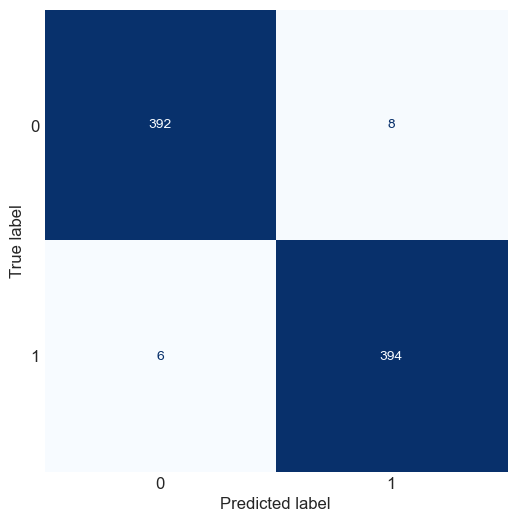

In [37]:

#plots always look good
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues', colorbar=False)
plt.grid()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
test Accuracy:0.96


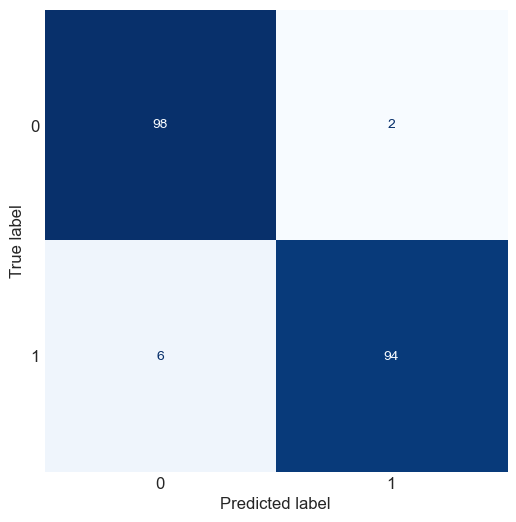

In [38]:
y_pred =model.predict( X_test)
#  calculate accuracy  
print(f'test Accuracy:{accuracy_score(y_pred=y_pred.argmax(axis = 1), y_true = y_test)}')

# calculate confusion matrix
cm = confusion_matrix(y_pred=y_pred.argmax(axis = 1), y_true = y_test)

#plots always look good
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues', colorbar=False)
plt.grid()
plt.show()

5529/5529 ━━━━━━━━━━━━━━━━━━━━ 3s 567us/step


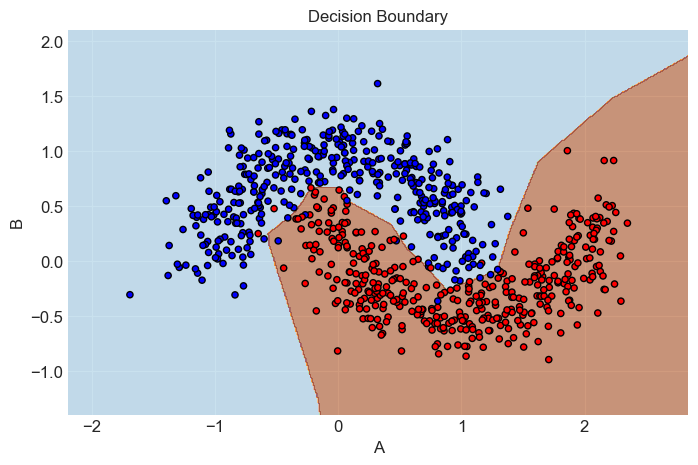

In [39]:
fn_plot_decision_boundary(model,X_train,y_train)